# Kernels

A imagem pode ser vista como uma grande matriz de pixels (isso já foi falado antes). Para aplicar algumas transformações mais robustas na imagem para modificá-las, lançamos mão de um recurso muito conhecido: os *kernels*.

Os *kernels* são pequenas matrizes que são "aplicadas" a matriz de pixels. A operação utilizada é uma convolução entre as duas matrizes.

A operação, simplificadamente, aplica uma operação matemática (multiplicação de matrizes) em cada coordenada (x,y) da imagem. Normalmente, o que se faz é "deslizar" o kernel sobre a imagem da esquerda para a direita e de cima para baixo, como na figura a seguir.

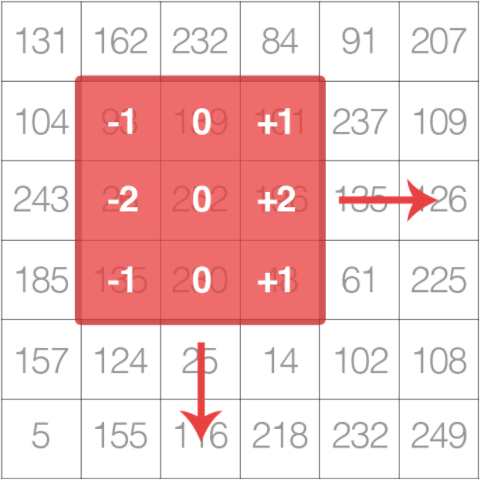

As operações de convolução são capazes de borrar e refinar imagens, extrair características básicas, como bordas, além de outras coisas. 

## Convolução

Como mostrado anteriormente, os *kernels* são aplicados a cada pixel da matriz da imagem examinando a vizinhança, sempre em consideração ao centro do kernel. 

A cada iteração, os pixels vizinhos são convoluídos (multiplicando os elementos da matriz *kernel* com os pixels da vez da matriz da imagem) e produzindo um único valor. Esse valor é armazenado em uma nova imagem na mesma posição (x,y) da imagem original).

Uma observação importante é que os *kernels* precisam ser matrizes com tamanhos arbitrários *MxN*, mas *M* e *N* precisam ser valores inteiros **ímpares**.

A razão para que os valores sejam ímpares é para que haja sempre um ponto central para análise.

## Passos

A convolução requer três componentes básicos:

1. uma imagem de entrada;
2. uma matriz de kernel que será aplicada na imagem;
3. uma imagem de saída para armazenar o resultado da aplicação da convolução entre o *kernel* e a imagem de entrada.

Os passos para realizar uma convolução são bem simples:

1. selecione uma coordenada *(x,y)* da imagem original;
2. posicione o centro do kernel nessa coordenada;
3. multiplique cada valor do *kernel* por seu correspondente na imagem original - e some os todos os valores resultantes das multiplicações.
4. use a mesma coordenada escolhida na imagem de saída para armazenar o resultado obtido no passo anterior.

Podemos mostrar um exemplo dessa operação a seguir:

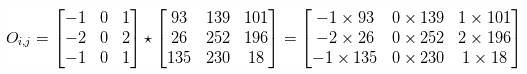

Que é igual a:

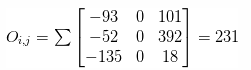

Depois disso, basta armazenar o valor obtido (231) na mesma coordenada, mas dentro da imagem de saída.

No fim, a operação é uma soma da multiplicação elemento-por-elemento dos elementos vizinhos de um pixel pela matriz de kernel.

## Exemplo de aplicação de kernel

### Borrar e Suavizar

Borrar uma imagem significa reduzir a quantidade de detalhes dela. Enquanto que esse "efeito" é indesejado em muitas situações práticas dentro da obtenção de imagens, ela é uma operação de pré-processamento bem comum no contexto da visão computacional.

O ato de borrar suaviza uma imagem para que seja possível focar no contexto geral dela. Ou seja, os pequenos detalhes são borrados e podemos nos concentrar nas partes que interessam, de fato. 

Em geral, esse efeito é obtido "misturando" os pixels ao redor de um ponto de interesse. Existem algumas maneiras de fazer isso e vamos cobrir as seguintes:

* média;
* gaussiana;
* mediana; e
* bilateral.

### Média

Essa operação faz exatamente o que o nome sugere e substitui o valor de um determinado pixel pelo valor médio dos seus pixels vizinhos.

Para fazer isso, utilizamos um *kernel* que "desliza" sobre toda a imagem, sempre borrando o pixel da imagem original correspondente ao centro do *kernel*. 

Um *kernel* típico para fazer essa operação pode ser visto a seguir:

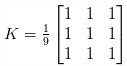

Note que cada entrada na matriz é uniformemente ponderada. Esse *kernel* possui tamanho 3x3, mas outros tamanhos podem ser definidos, como:

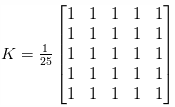

Nesse último caso, a imagem fica mais borrada do que quando aplicamos um *kernel* 3x3. Isso é intuitivo, já que pixels mais distantes do centro vão passar a contribuir para determinação do valor do novo pixel.

Sendo assim, quanto maior a dimensão do *kernel* mais borrada a imagem fica. 

Vamos mostrar a seguir exemplos de qual o efeito que o borramento tem em uma imagem e qual o impacto do tamanho do *kernel*.


In [2]:
# importando a biblioteca OpenCV
import cv2
# importando a versão do cv2.imshow do opencv para o colab
from google.colab.patches import cv2_imshow

O OpenCV possui uma função para aplicar a suavização por borramento da imagem:

`cv2.blur`

Basta passar a imagem e tamanho do kernel a ser aplicado como parâmetros.

Nesse caso, vamos aplicar três tamanhos de *kernel* de média diferentes.

In [7]:
# Mas, antes vamos baixar a imagem...
!wget 'https://raw.githubusercontent.com/danielsabino/ppgti3007_cv_2021_2/main/semana01/02/shy_guy.png' -O 'imagem.jpg'

--2022-01-28 22:34:52--  https://raw.githubusercontent.com/danielsabino/ppgti3007_cv_2021_2/main/semana01/02/shy_guy.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 316859 (309K) [image/png]
Saving to: ‘imagem.jpg’

imagem.jpg          100%[===================>] 309.43K  --.-KB/s    in 0.02s   

2022-01-28 22:34:53 (12.3 MB/s) - ‘imagem.jpg’ saved [316859/316859]



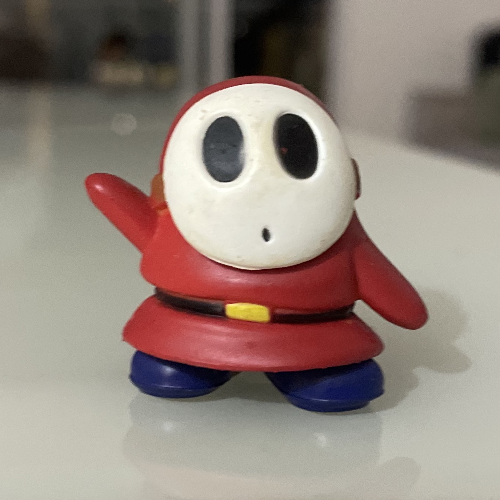

Imagem original


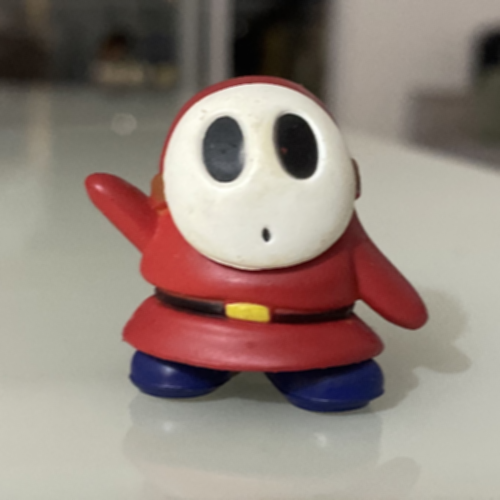

Kernel Média (3, 3)


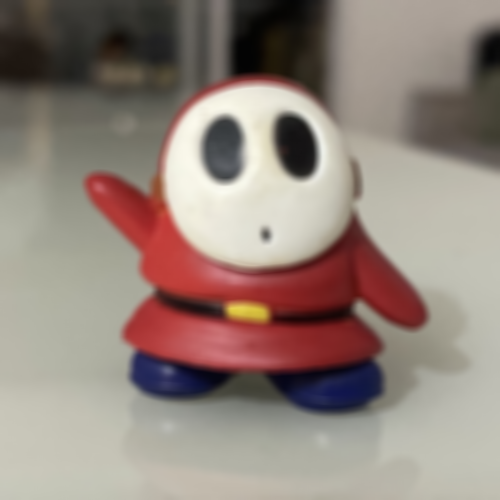

Kernel Média (9, 9)


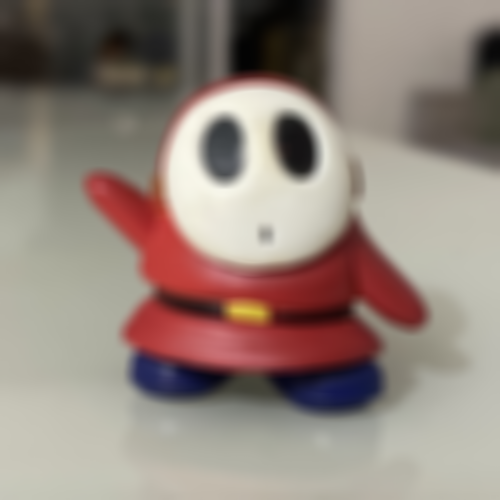

Kernel Média (15, 15)


In [9]:
# carrega as imagems, inicializa a lista de kernels e mostra a imagem original
image = cv2.imread('imagem.jpg')

cv2_imshow(image)
print('Imagem original')

kernelSizes = [(3, 3), (9, 9), (15, 15)]

# aplica todos os kernels de média sobre as imagens
for (kX, kY) in kernelSizes:
  blurred = cv2.blur(image, (kX, kY))
  cv2_imshow(blurred)
  print(f"Kernel Média ({kX}, {kY})")

Conforme já previsto, quanto maior o tamanho do *kernel* de média, mais borrada fica a imagem. A mesmo tempo, é possível perceber que alguns formatos da imagem (prédios, por exemplo) ainda são possíveis de ser identificados.

Deve-se, portanto, buscar um balanço na quantidade de suavização que se busca, já que podemos perder características importantes da imagem, como as bordas dos elementos de interesse.

### Gaussiano

O *kernel* de média atribui pesos iguais para os vizinhos de um pixel (tornando-o simples de entender) e essa característica pode levar a um super borramento facilmente.

O borramento gaussiano, por outro lado, utiliza uma média ponderada dos vizinhos de um pixel. Ou seja, os vizinhos mais próximos contribuem mais para o valor final de um determiando pixel.

A imagem de saída desse tipo de borramento é menos borrada que o anterior, mas o borramento acaba sendo mais "natural". Como consequência, conseguimos conservar um pouco mais das bordas da imagem quando comparado ao borramento por média.

O kernel gaussiano é dado por:

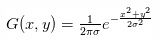

em que, *x* e *y* são as respectivas distâncias nos eixos horizontal e vertical com relação ao centro do *kernel* e *theta* é o desvio padrão do *kernel*.

Vamos ver qual o resultado da aplicação desse *kernel* em uma imagem. O OpenCV também já conta com uma função para implementar o borramento gaussiano, dado pela função `cv2.GaussianBlur`, que recebe os mesmo parâmetros da `cv2.blur` e, adicionalmente, o desvio-padrão do *kernel*.

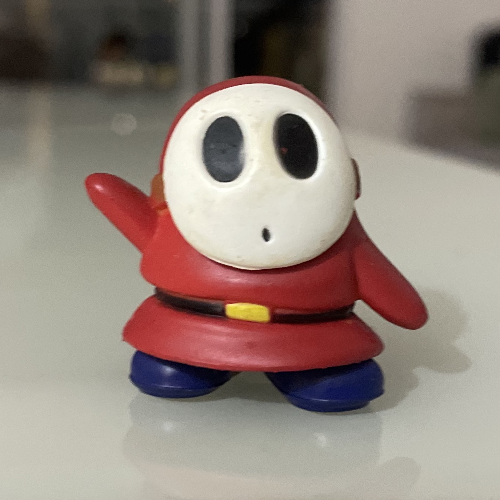

Imagem original


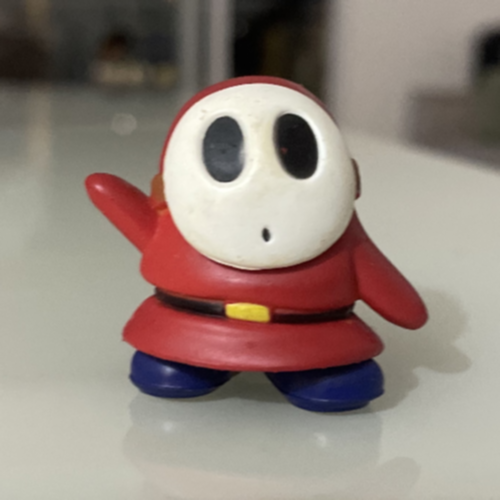

Gaussiano (3,3)


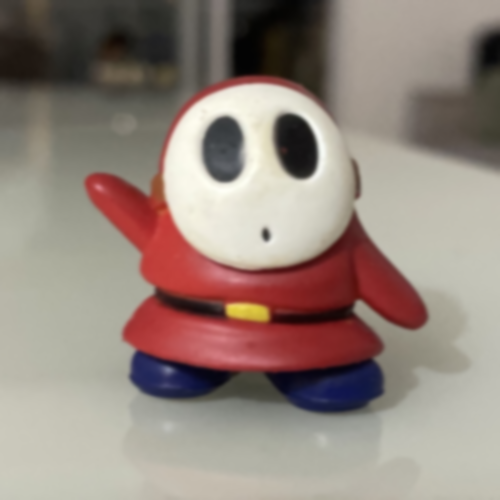

Gaussiano (9,9)


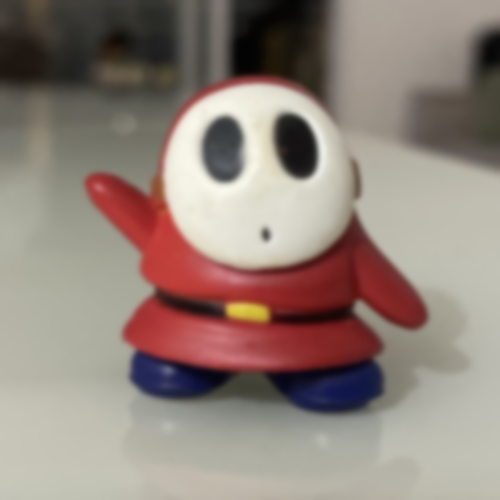

Gaussiano (15,15)


In [10]:
# considerando que já carregamos a imagem original e vamos utilizar os
# mesmo tamanhos de kernel, basta aplicar a 

cv2_imshow(image)
print('Imagem original')

for (kX, kY) in kernelSizes:

  # a função recebe a imagem, o tamanho do kernel e o desvio-padrão do kernel.
  # o parâmetro 0 informa que o desvio-padrão será calculado automaticamente
  # pelo OpenCV.
  blurred = cv2.GaussianBlur(image, (kX, kY), 0)
  cv2_imshow(blurred)
  print(f'Gaussiano ({kX},{kY})')

### Mediana

Mais um tipo de borramento possível envolve a utilização da mediana (ao invés da média) como medida de contribuição dos vizinhos na criação do "novo pixel".

Esse tipo de operação normalmente é utilizada como um filtro para remoção de ruído. Mais especificamente, ela é eficiente na remoção de ruídos do tipo *sal e pimenta* (pontos brancos e pretos na imagem).

O *kernel* desse filtro deve ser **quadrado** e ter tamanho *K x K*, onde *K* é um inteiro **ímpar**. Note que diferente dos *kernels* anteriores, esse tipo de filtro **deve** assumir o formato de matriz quadrada, em contraposição aos modelos anteriores que poderiam ter formato retangular.

A premissa para assumir que o ruído deve ser removido é porque os valores dos pixels são sempre substituídos por **outros que estão, de fato, na imagem**. Enquanto que nos filtros de gaussiana e média o resultado pode ser um valor diferente de um pixel já existente, por definição, utilizando o filtro de mediana, o valor a ser inserido deve estar presente na imagem.

Para utilizar o borramento por mediana, basta chamar a função `cv2.medianBlur`. Ela aceita os mesmos parâmetros da função de média: a imagem e o tamanho do *kernel*.

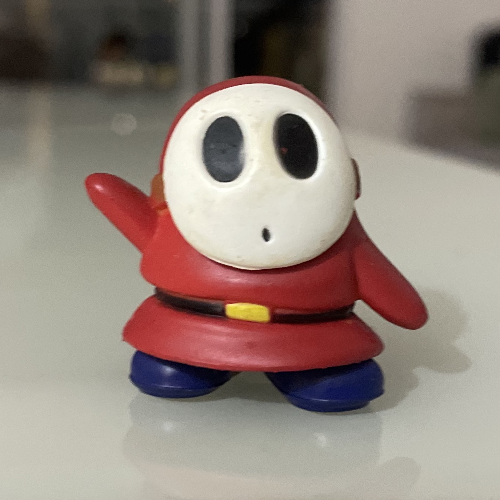

Imagem original


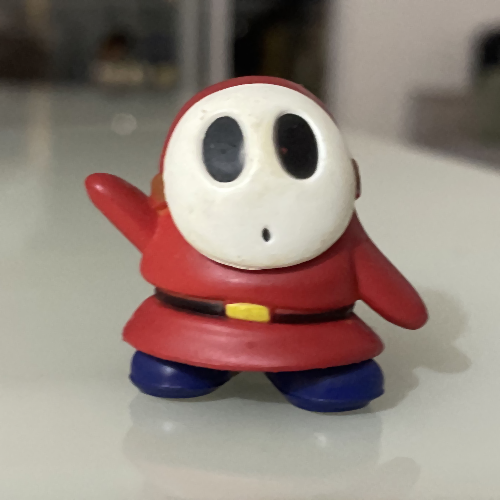

Mediana: 3


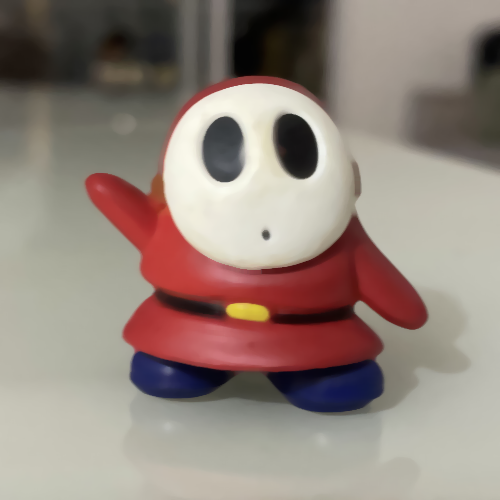

Mediana: 9


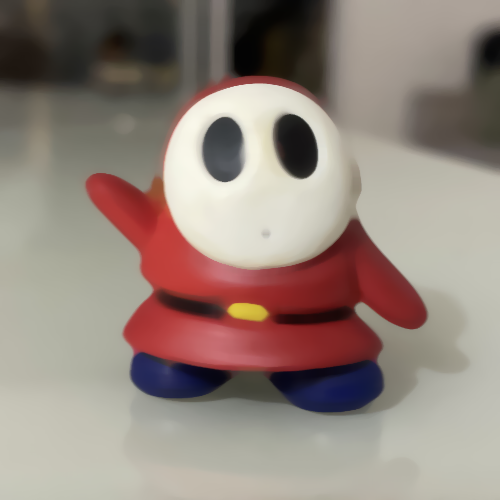

Mediana: 15


In [11]:
cv2_imshow(image)
print('Imagem original')

for k in (3, 9, 15):
  blurred = cv2.medianBlur(image, k)
  cv2_imshow(blurred)
  print(f'Mediana: {k}')

Note que o filtro remove uma quantidade de detalhes bem maior que os anteriores. Esse efeito de suavização acaba por retirar muitas "imperfeições". Isso pode ter muitas aplicações, mas note como as partes da imagem ficaram mais homogêneas.

Para ilustrar o funcionamento dele no contexto de remoção de ruído, veja o exemplo a seguir. Note que o ruído é basicamente removido quando aplicamos um *kernel* 3x3 ao custo de perda de alguns detalhes. Por outro lado, aumentarmos o tamanho do *kernel*, os detalhes da imagem vão gradativamente sendo eliminados até se tornar um borrão na tela.

*Fonte da imagem: https://www.suntos.com.np/salt-and-pepper-noise.png*

--2022-01-28 22:43:22--  https://raw.githubusercontent.com/danielsabino/ppgti3007_cv_2021_2/main/semana01/02/tiger.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81079 (79K) [image/png]
Saving to: ‘tiger.png’

tiger.png           100%[===================>]  79.18K  --.-KB/s    in 0.007s  

2022-01-28 22:43:23 (10.7 MB/s) - ‘tiger.png’ saved [81079/81079]



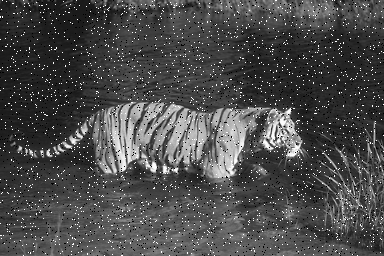

Imagem original


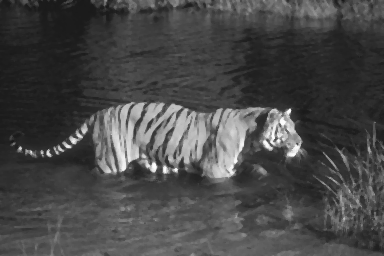

Mediana: 3


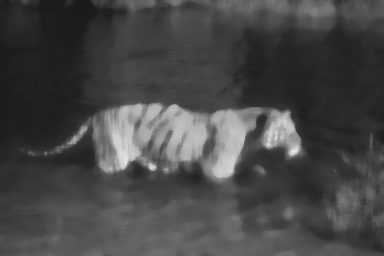

Mediana: 9


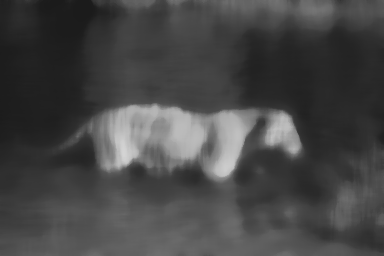

Mediana: 15


In [12]:
!wget 'https://raw.githubusercontent.com/danielsabino/ppgti3007_cv_2021_2/main/semana01/02/tiger.png' -O 'tiger.png'
image = cv2.imread('tiger.png')

cv2_imshow(image)
print('Imagem original')

for k in (3, 9, 15):
  blurred = cv2.medianBlur(image, k)
  cv2_imshow(blurred)
  print(f'Mediana: {k}')

### Bilateral

O último tipo de borramento a ser visto é o bilateral. Ele é utilizado para reduzir um dos efeitos colaterais quando aplicamos um borramento na imagem: **a perda das bordas**. 

O borramento bilateral utiliza duas funções gaussianas para construir o novo pixel. A primeira considera a vizinha espacial (aqueles próximos ao pixel na posição *(x,y)*). A segunda gaussiana modela a intensidade do pixel resultante considerando somente os pixels vizinhos que possuem intensidade similar ao pixel central.

Isso pode ser racionalizado da seguinte maneira: se pixels dentro de uma vizinhança possuem valores de intensidade similares, eles devem pertencer a um **mesmo objeto** na imagem; por outro lado, se pixels vizinhos possuem valores muitos contrastantes, provavelmente, estamos analisando **a borda** de um objeto da imagem. 

Essa propriedade dá ao borramento bilateral a capacidade de reduzir ruídos de uma imagem enquanto conserva (até certo ponto) as bordas dos objetos dentro delas.

Vale salientar que esse tipo de filtro possui custo computacional maior que todos os anteriores. Por isso, sua aplicação deve ser ponderada.

Para comparar aos demais, vamos mostrar exemplos utilizando a função do OpenCV `cv2.bilateralFilter`. Essa função recebe quatro parâmetros:

* a imagem a ser borrada;
* o diâmetro da vizinhança a ser analisada: quanto maior, mais pixels são inseridos nos cálculos;
* o desvio-padrão de cores: um valor mais alto implica que mais cores na vizinhança serão consideradas;
* o desvio-padrão espacial: o quanto pixels distantes contribuem na formação do novo pixel.

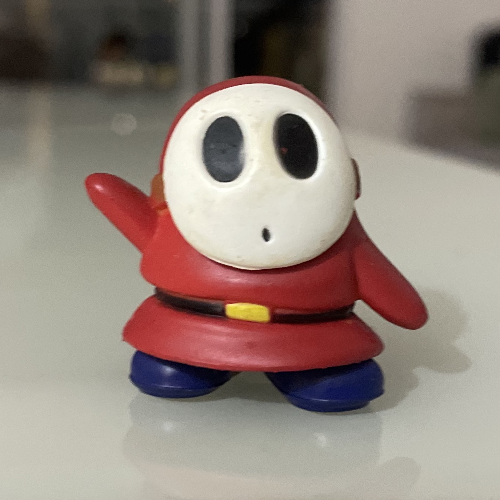

Imagem original


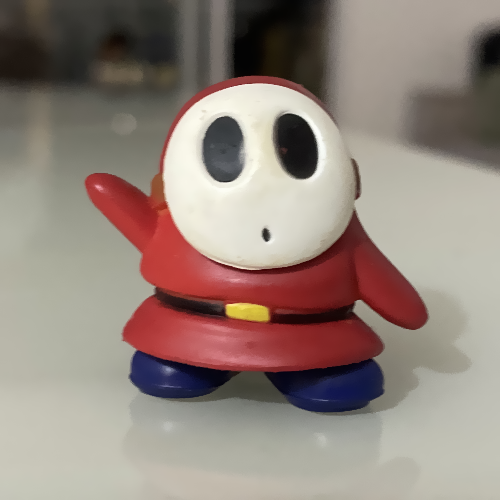

Bilateral d=11, sc=21, ss=7


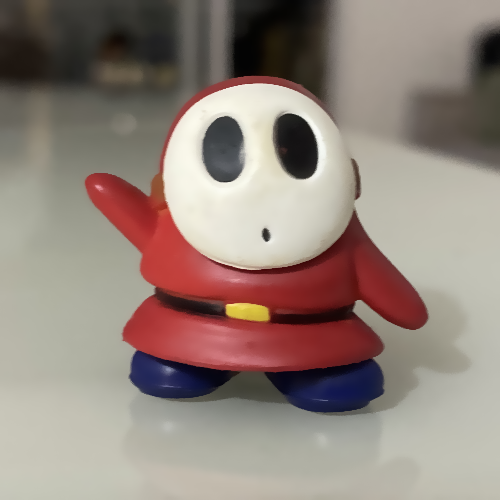

Bilateral d=11, sc=41, ss=21


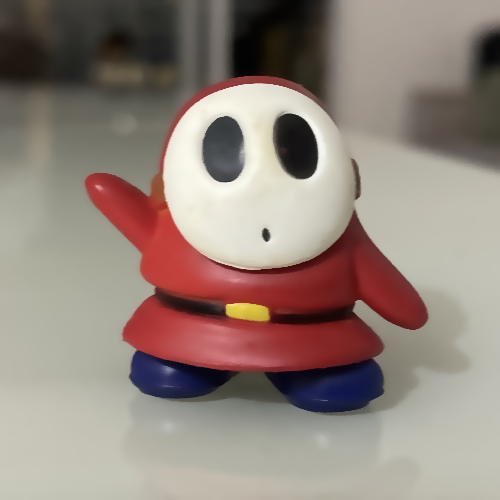

Bilateral d=11, sc=61, ss=39


In [13]:
# carrega e mostra a imagem
image = cv2.imread('imagem.jpg')

cv2_imshow(image)
print('Imagem original')

# parâmetros a serem utilizados no filtro bilateral (diâmetro, desvio-padrão de cores)
# e desvio-padrão espacial
params = [(11, 21, 7), (11, 41, 21), (11, 61, 39)]

# loop em todas as combinações de parâmetros
for (diameter, sigmaColor, sigmaSpace) in params:
  blurred = cv2.bilateralFilter(image, diameter, sigmaColor, sigmaSpace)	
  cv2_imshow(blurred)
  print("Bilateral d={}, sc={}, ss={}".format(diameter, sigmaColor, sigmaSpace))

Veja que as bordas ficam cada vez mais acentuadas quanto maior os desvios-padrões utilizados, ao mesmo tempo que as partes internas da imagem são borradas.

# Iluminação

O sucesso de um algoritmo de Visão Computacional, muitas vezes, é determinado antes de se iniciar o tratamento da imagem ou da implementação dos algoritmos para identificação de objetos. As condições de iluminação são priomordias para que os elementos de uma imagem sejam corretamente identificados.

De pouco adianta ter um bom algoritmo se as condições de captura não são favoráveis. Não existe milagre aqui!

Note que uma dispositivo de captura de imagem não "filma" o objeto em si, mas a luz que é refletida por ele. Por isso, garantir que os objetos a serem alvo de análise estejam com condições adequadas de iluminação pode determinar se o sistema de visão computacional vai ter sucesso ou não.

Adicionalmente, sabe-se que objetos distintos podem requerer condições de iluminação diferentes para que sejam corretamente expostos em uma imagem.

Por exemplo, para iluminar uma pessoa, uma simples lâmpada pode ser suficiente (ou o flash da câmera). No entanto, se você tenta tirar uma foto na frente do espelho com o flash ligado, vai notar que o resultado não é satisfatório, já que o espelho vai refletir toda a luz emitida de volta para e isso deve estragar a foto. Inclusive, a quantidade de luz pode acabar ofuscando o objeto a ser detectado.

Então, para aumentar as chances de que os algoritmos podem fazer seu trabalho de forma apropriadas, as condições de iluminação devem ter três caracerísticas principais:

## Alto contraste

Maximizar o contraste entre as regiões de interesse e o resto da imagem. Ou seja, os objetos que você quer analisar (detectar, extrair características, descrever, classificar, etc.) devem se "destacar" do demais elementos da imagem.

## Generalizável

As condições de iluminação devem ser suficientemente consistentes para conseguir identificar variações no objeto a ser analisado. Por exemplo, se o objetivo é reconhecer moedas do Real, a fonte de iluminação deve promover condições para que tanto moedas de R\$ 0,05 sejam bem iluminadas quanto as de R\$ 0,50 e R\$ 1,00 (assim como as demais). 

## Estável

Ter condições estáveis de iluminação é uma das mais difíceis de garantir, sobretudo em ambientes externos, onde a hora, o tempo e fatores externos podem alterar drasticamente a iluminação. Mesmo em ambientes internos, diferentes tipos de lâmpadas geram padrões de iluminação diferentes. 


Diante disso, é muito importante para qualquer aplicação ser desenvolvida que as condições de iluminação sejam previamente consideradas. Caso contrário, o "prejuízo" pode não ser passível de recuperação ao escrever o código do sistema.


# Espaço de cores

Um espaço de cores é uma organização específica para que nós possamos representar e reproduzir as cores.

Um modelo de cores, por outro lado, é um método abstrato para representar as cores de uma maneira numérica. O mais conhecido desses modelos é o RGB.

Podemos simplificar a nomenclatura desse tópico como o espaço de cores definindo tanto o modelo e a função abstrata de mapeamento usada para definir, de fato, as cores. 

Vamos cobrir aqui três espaços de cores: RGB, HSV e L\*a\*b. Além disso, vamos falar sobre a representação em escala de cinzas, que é amplamente utilizada pelo modelos de visão computacional.

## RGB

A sigla *RGB* está relacionada ao nome das três cores básicas dessa representação: vermelho (*Red*), verde (*Grenn*) e azul (*Blue*).

Ou seja, para definir uma imagem dentro desse espaço de cores, basta que a gente defina a quantidade de vermelho, verde e azul que cada pixel contém.

Os valores assumidos pelos canais (são três) estão dentro do intervalo de 0 a 255 (256 valores possíveis), em que 0 indica a falta de representação da cor daquele canal e 255 indica a representação completa dele.

O *RGB* constitui o que chamamos de espaço aditivo de cores (figura a seguir): quanto mais de cada cor é adicionada, mais brilhante o pixel se torna e mais próximo de branco ele fica.

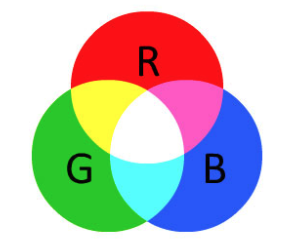

Podemos visualizar o espaço RGB como um cubo, uma vez que ele é definido por três dimensões, como cada valor dentro do mesmo intervalo. Nesse caso, temos um total possível de cores de 16.277.216 (256\*256\*256). Veja um exemplo dessa representação na figura a seguir.

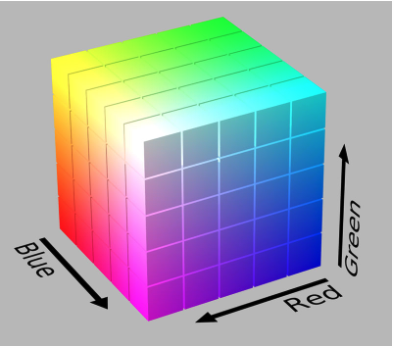

Para ilustrar como cada canal contribui em uma imagem, vejamos o código a seguir:


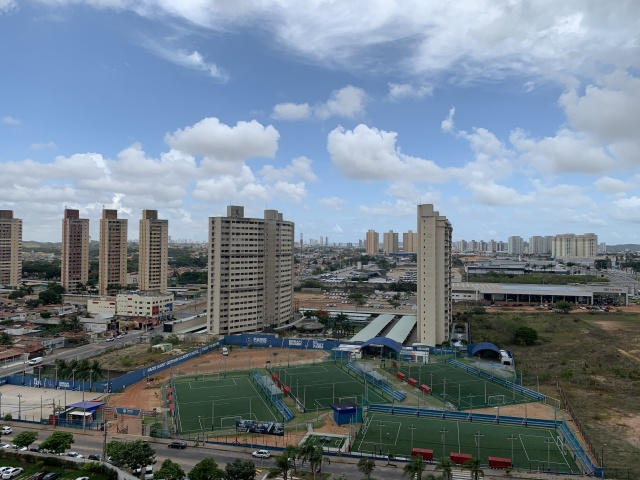

original


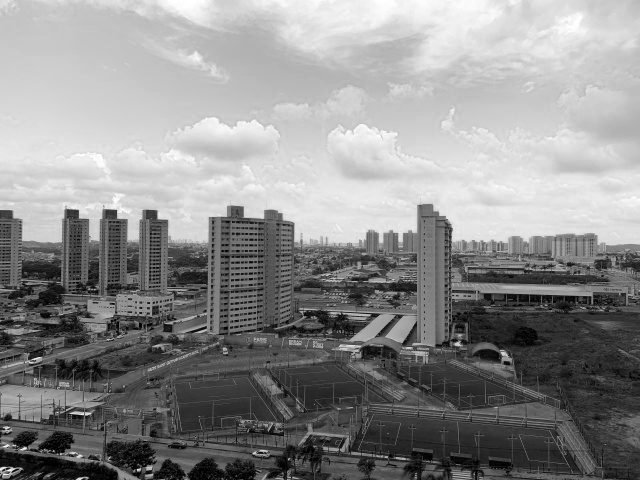

B


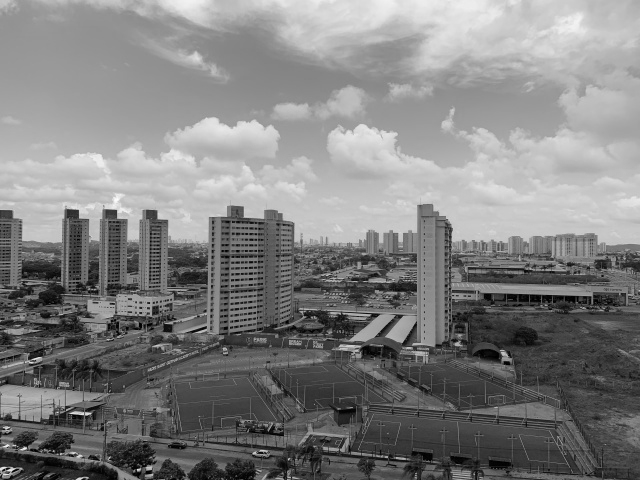

G


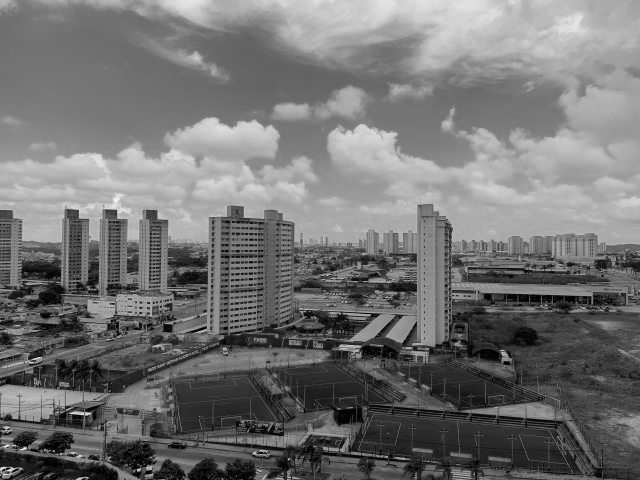

R


In [ ]:
cv2_imshow(image)
print('original')

# loop para passar por cada canal e mostrá-lo.
# a função cv2.split separa cada canal de uma imagem em cores.
for (name, chan) in zip(("B", "G", "R"), cv2.split(image)):
  # como os canais agora estão separados, a visualização de cada um só tem uma
  # dimensão.
  cv2_imshow(chan)
  print(name)



As imagens em escala de cinza representam os valores individuais de cada canal em termos de intensidade. Quanto mais claro, maior o valor do daquele canal no pixel. 

Isso fica mais evidente quando olhamos para o ceu (na imagem). O canal azul possui valores muito maiores (mais claros) nessa região que os demais canais.

Apesar de não ser tão intuitivo na utilização, o espaço RGB é o mais utilizado, sem dúvida.

## HSV

O espaço HSV representa o espaço de cores como um cilindro e não como um cubo. Como foi visto antes, o espaço RGB o 'branco' e a 'iluminação' de uma cor é dada pela combinação dos componentes do canais das cores vermelhor, verde e azul. Já no espaço HSV, existe uma separação entre os canais de cores e iliminação.

Os três componentes do espaço de cores são:

* Hue (H): qual cor "pura" estamos examinando. Por exemplo, todos os tons de vermelho possuem um mesmo valor H.
* Saturation (S): quão branco uma cor é. Uma cor complemtamente satura é considerada "pura" enquanto que uma cor com saturação zero vai ser branco puro.
* Value (V): o valor controla a iluminação de uma cor. Quando o valor de *V* é zero, isso vai indicar que a cor preta, e a medida que aumentamos esse valor, a cores vão ficando mais claras.

As bibliotecas de visão computacional podem representar os canais do espaço HSV utilizando diferentes intervalos de valores. No entanto, a represenção do OpenCV utiliza uma representação de arrays de 8 bits sem sinal para o canal *H*. Ou seja, temos 180 possíveis valores \[0-179\]. Os canais *S* e *V* estão dentro do intervalo \[0,255\].

Para demonstrar o funcionamento desse espaço de cores, vamos partir de uma imagem representada em RGB e, depois fazer a conversão para HSV. Caso possua uma imagem já codificada com esse formato, fique a vontade para pular essa etapa.

A função no OpenCV que faz essa conversão é a `cv2.cvtColor`. Valem duas observações:
1. o OpenCV representa o espaço RGB na ordem inversa, ou seja, BGR.
2. a função requer que especifiquemos o espaço de cores final. Isso é feito através da 'flag' `cv2.COLOR_BGR2HSV`.



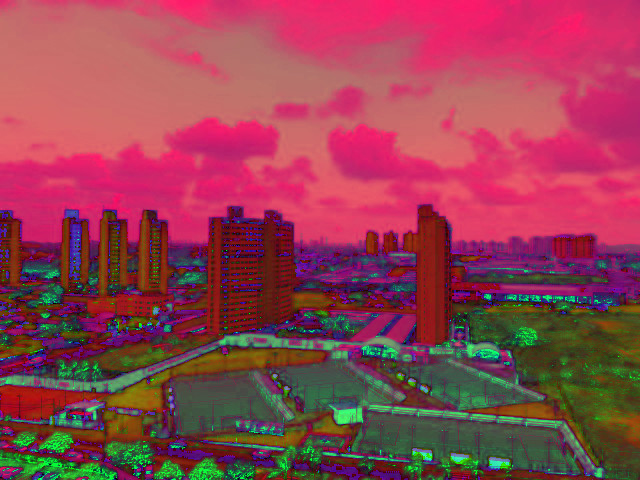

HSV


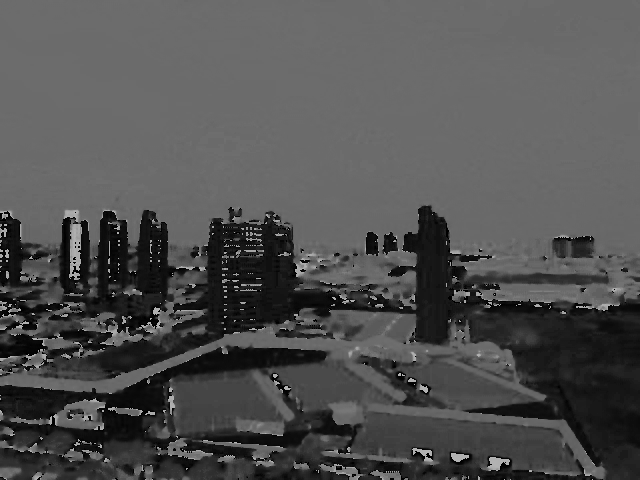

H


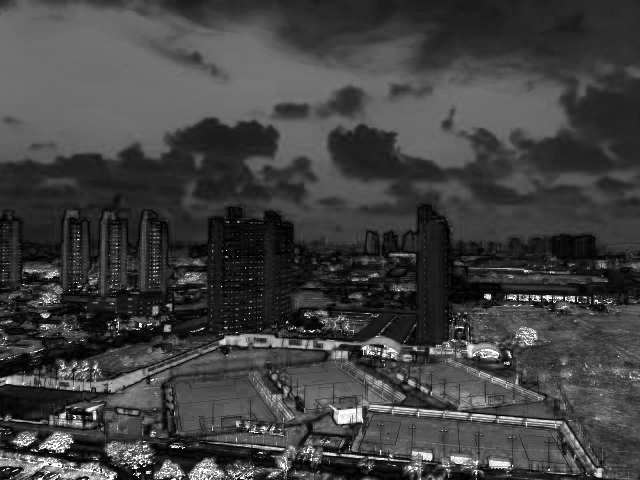

S


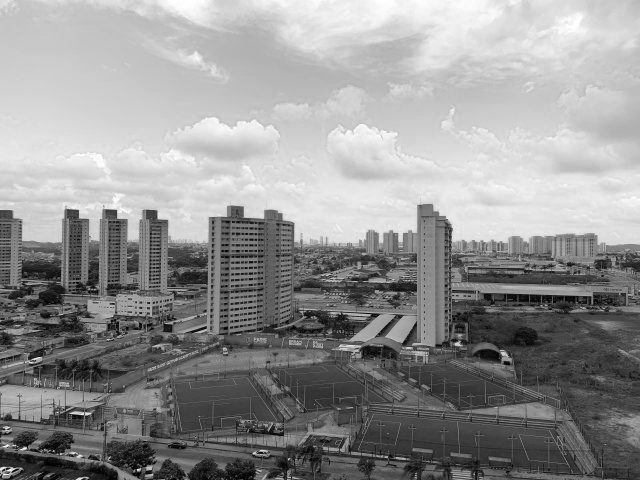

V


In [ ]:
# converte a imagem de RGB para HSV e mostra na tela.
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)
print('HSV')

# loop para passar por cada canal e mostrá-lo.
# a função cv2.split separa cada canal de uma imagem em cores.
for (name, chan) in zip(("H", "S", "V"), cv2.split(hsv)):
  cv2_imshow(chan)
  print(name)

## Escala de Cinza

A última representação que vamos apresentar não é, na verdade, um espaço de cores, mas uma maneira de representar o espaço RGB em um único canal: o de escala de cinza.

Essa representação também adota valores dentro do intervalo \[0,255\], onde 0 representa a cor preta e 255, a cor branca. Todos os valores intermediários são tons diferentes de cinza.

A conversão a partir do espaço RGB utiliza uma ponderação diferente para os canais, considerando que a percepção humana é mais sensível ao vermelhor e verde que ao azul. Assim, utilizamos a seguinte equação para fazer a conversão:

$Y = 0.299R + 0.587G + 0.114B$

Utilizamos essa representação quando as cores da imagem não são imprescindíveis para realizar a tarefa desejada. Por exemplo, para detecção de faces as cores da imagem não são importantes. Ao descartar as cores, portanto, podemos ter economizar espaço de memória e computar de maneira mais eficiente os procedimentos dentro do algoritmo.

A conversão pode também ser feita com a função do OpenCV `cv2.cvtColor`. A flag utilizada aqui é a `cv2.COLOR_BGR2GRAY`. Um exemplo de conversão pode ser visto a seguir.

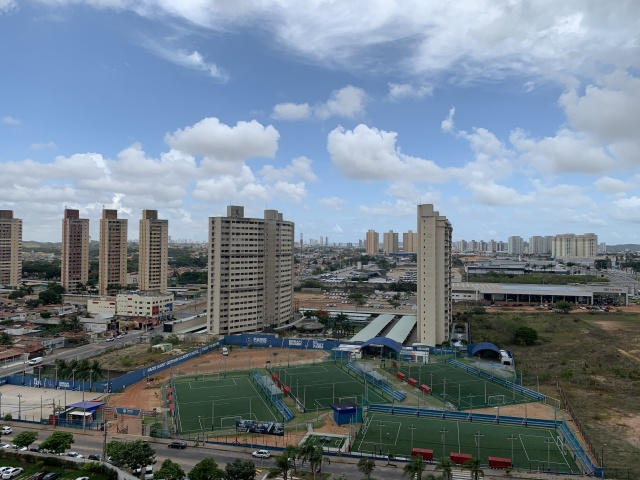

Orignal


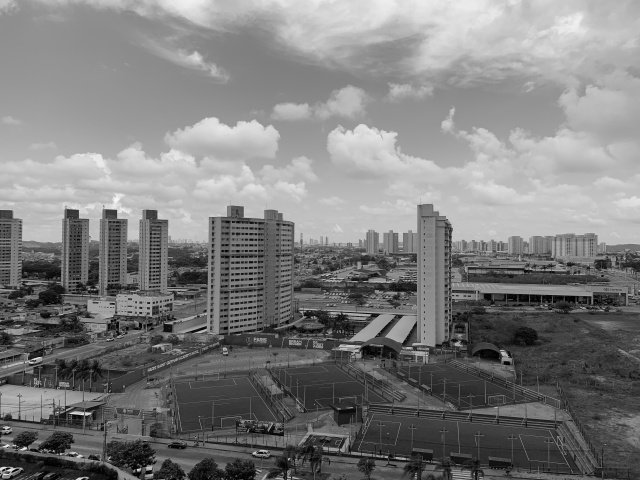

Escala de cinza


In [ ]:
# show the original and grayscale versions of the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
print('Orignal')
cv2_imshow(gray)
print('Escala de cinza')